<a href="https://colab.research.google.com/github/the-y9/Deep-Learning-using-PyTorch/blob/main/notebooks/Day3_DL_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
import torchvision
from torchvision import datasets, transforms

In [ ]:
from torch.utils.data import DataLoader
# efficient in creating batches and in the process of itrating tohrough batches during

In [ ]:
dir(datasets)
help(datasets.FashionMNIST)

Help on class FashionMNIST in module torchvision.datasets.mnist:

class FashionMNIST(MNIST)
 |  FashionMNIST(root: Union[str, pathlib.Path], train: bool = True, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, download: bool = False) -> None
 |  
 |  `Fashion-MNIST <https://github.com/zalandoresearch/fashion-mnist>`_ Dataset.
 |  
 |  Args:
 |      root (str or ``pathlib.Path``): Root directory of dataset where ``FashionMNIST/raw/train-images-idx3-ubyte``
 |          and  ``FashionMNIST/raw/t10k-images-idx3-ubyte`` exist.
 |      train (bool, optional): If True, creates dataset from ``train-images-idx3-ubyte``,
 |          otherwise from ``t10k-images-idx3-ubyte``.
 |      download (bool, optional): If True, downloads the dataset from the internet and
 |          puts it in root directory. If dataset is already downloaded, it is not
 |          downloaded again.
 |      transform (callable, optional): A function/transform that  takes in a PIL image
 | 

In [ ]:
train_data = datasets.FashionMNIST('.data', train = True, download = True)

100%|██████████| 26421880/26421880 [00:01<00:00, 17215704.37it/s]


Extracting .data/FashionMNIST/raw/train-images-idx3-ubyte.gz to .data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 274193.07it/s]


Extracting .data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to .data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4937716.98it/s]


Extracting .data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to .data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 3161850.49it/s]

Extracting .data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to .data/FashionMNIST/raw



In [ ]:
len(train_data)

60000

In [ ]:
train_data.data.shape, train_data.targets.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [ ]:
print(f"{train_data.classes},\n {train_data.class_to_idx}")

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
 {'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [ ]:
train_data[0]

(<PIL.Image.Image image mode=L size=28x28>, 9)

In [ ]:
train_data[0][0]

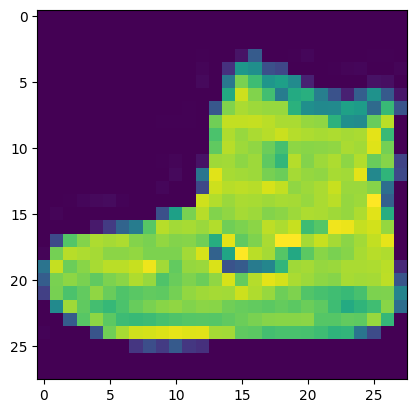

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0][0])

In [ ]:
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [ ]:
train_data.data.shape #shows channel = 1

torch.Size([60000, 28, 28])

**ToTensor()**

Converts images into tensor and then standardise dataset (PIL)

In [ ]:
transform = transforms.ToTensor()
transform1 = transforms.Compose((transforms.ToTensor(), transforms.Normalize((0.5), (0.5))))

In [ ]:
train_data = datasets.FashionMNIST('.data', train = True, transform = transform1)

In [ ]:
train_data[0] # but.dat[0][0] does not change

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [ ]:
transform2 = transforms.Compose((transforms.ToTensor, transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))))

In [ ]:
train_set = datasets.CIFAR10('.data', train = True, transform = transform2 )# download = True)

In [ ]:
train_set.data.shape #3 channels

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
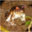

In [ ]:
train_set.data[0]

In [ ]:
train_set[0]

In [ ]:
train_set.targets, train_set.classes, train_set.class_to_idx

([6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,
  7,
  0,
  4,
  7,
  5,
  5,
  1,
  0,
  9,
  6,
  9,
  0,
  8,
  7,
  8,
  8,
  2,
  5,
  2,
  3,
  5,
  0,


In [ ]:
train_iter = DataLoader(train_data, batch_size = 100, shuffle = True)

In [ ]:
type(train_iter)

torch.utils.data.dataloader.DataLoader

In [ ]:
for features,labels in train_iter:
  print(features)
  break # on first 100

tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],


        [[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],


        [[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.000

In [ ]:
## nn.Linear(in,out)
# nn.Conv2d(in_channels,out_channels,kernel_size)

In [ ]:
iterator = iter(train_iter)
feat, lab = next(iterator)
x = feat[0]
x.shape

torch.Size([1, 28, 28])

$ H_0 = \frac{H+2P-K}{S} + 1 $, $W_0 = \frac{W+2P-K}{S} + 1 $

In [ ]:
conv = nn.Conv2d(1, 6, 5)

In [ ]:
conv.weight.shape

torch.Size([6, 1, 5, 5])

6 kernels of size $1 * 5*5$

In [ ]:
x1 = conv(x)

In [ ]:
x1.shape

torch.Size([6, 24, 24])

(N,C,H,W)

In [ ]:
pool1 = nn.MaxPool2d(2, 2)
x2 = pool1(x1)
x2.shape

torch.Size([6, 12, 12])

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1 = nn.Conv2d(1,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6, 6,5)
    self.fc1 = nn.Linear(6*4*4 , 80)    #6*4*4 how?
    self.fc2 = nn.Linear(80, 20)
    self.fc3 = nn.Linear(20, 10) # classification problem for 10 classes

  def forward(self,x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = self.pool(x)
    x = x.view(-1,6*4*4)  #why view how (-1,6*4*4)?
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    return x

Model = CNN()

In [ ]:
x = feat[0]
Model(x)

tensor([[ 0.2060,  0.2773, -0.0885,  0.1114, -0.1032, -0.0211,  0.2460,  0.0767,
         -0.0650, -0.0098]], grad_fn=<AddmmBackward0>)

Training
- Define Criterion
- Optimizer
---
1. zero_grad()
2. Forward Pass
3. Loss compute
4. Backprop
5. Updation

- 1 epoch = pass through entire dataset
- 1 iteration = pass through 1 batch
  - total points = 60000
  - batch size = 100
  - batches = 600

In [ ]:
Loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(Model.parameters(), lr = 0.001, momentum = 0.9)
for epoch in range(3):
  total_correct_pts = 0
  for features, labels in train_iter:
    optimizer.zero_grad
    output = Model(features)
    ls = Loss(output, labels)
    ls.backward()
    optimizer.step()

    corr = torch.argmax(output, axis = 1) == torch.as_tensor(labels)
    total_correct = torch.count_nonzero(corr)
    total_correct_pts += total_correct
  print(total_correct_pts/60000)

tensor(0.1011)
tensor(0.1000)
tensor(0.0994)


In [ ]:
test_data = datasets.FashionMNIST('.data', train = False, download = True)

In [ ]:
test_iter = DataLoader(test_data, shuffle = False, batch_size = 100)

In [ ]:
Model.eval()
test_output = Model()

In [ ]:
test_corr = 0
for data in test_iter:
  feat, lab = data
  test_out = Model(feat)

  corr_classes = torch.argmax(test_out, axis = 1) == torch.as_tensor(lab)
  tcd = torch.count_nonzero(corr_classes)
  test_corr+= tcd

print(test_corr/10000)

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>